# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = ['sgd', 'rmsprop', 'adagrad', 'adam']

In [8]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    for opt in OPTIMIZER:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        
        if opt == 'sgd':
            optimizer = keras.optimizers.SGD(lr=lr)
        elif opt == 'rmsprop':
            optimizer = keras.optimizers.RMSprop(lr=lr)
        elif opt == 'adagrad':
            optimizer = keras.optimizers.Adagrad(lr=lr)
        elif opt == 'adam':
            optimizer = keras.optimizers.Adam(lr=lr)
        
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-opt-%s" % str(opt) + " , " + "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.4460 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 2s 43us/step - loss: 14.4469 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.8042 - acc: 0.3649 - val_loss: 1.8089 - val_acc: 0.3463
Epoch 4/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.7635 - acc: 0.3801 - val_loss: 1.7403 - val_acc: 0.3878
Epoch 5/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.7221 - acc: 0.3948 - val_loss: 1.7201 - val_acc: 0.3975
Epoch 6/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.6986 - acc: 0.4034 - val_loss: 1.6787 - val_acc: 0.4103
Epoch 7/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.6662 - acc: 0.4150 - val_loss: 1.6963 - val_acc: 0.3977
Epoch 8/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.6457 - acc: 0.4237 - val_loss: 1.8031 - val_acc: 0.3655
Epoch 9/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.6238 - acc: 0.4294 - val_loss: 1.6292 - val_acc: 0.4265
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [============

Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 2s 39us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [

Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 

Epoch 7/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.9642 - acc: 0.3165 - val_loss: 1.9537 - val_acc: 0.3180
Epoch 8/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.9427 - acc: 0.3235 - val_loss: 1.9344 - val_acc: 0.3246
Epoch 9/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.9242 - acc: 0.3304 - val_loss: 1.9185 - val_acc: 0.3308
Epoch 10/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.9082 - acc: 0.3362 - val_loss: 1.9017 - val_acc: 0.3353
Epoch 11/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.8940 - acc: 0.3416 - val_loss: 1.8891 - val_acc: 0.3434
Epoch 12/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.8814 - acc: 0.3441 - val_loss: 1.8771 - val_acc: 0.3430
Epoch 13/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.8702 - acc: 0.3476 - val_loss: 1.8675 - val_acc: 0.3491
Epoch 14/50
50000/50000 [============

50000/50000 [==============================] - 2s 39us/step - loss: 1.5321 - acc: 0.4548 - val_loss: 1.7203 - val_acc: 0.3856
Epoch 9/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5034 - acc: 0.4650 - val_loss: 1.5508 - val_acc: 0.4556
Epoch 10/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.4720 - acc: 0.4738 - val_loss: 1.7597 - val_acc: 0.4192
Epoch 11/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.4445 - acc: 0.4867 - val_loss: 1.5489 - val_acc: 0.4416
Epoch 12/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4144 - acc: 0.4947 - val_loss: 1.7191 - val_acc: 0.3997
Epoch 13/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3924 - acc: 0.5057 - val_loss: 1.5026 - val_acc: 0.4683
Epoch 14/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3653 - acc: 0.5114 - val_loss: 1.5581 - val_acc: 0.4599
Epoch 15/50
50000/50000 [======================

50000/50000 [==============================] - 2s 39us/step - loss: 1.5459 - acc: 0.4599 - val_loss: 1.5555 - val_acc: 0.4535A: 0s - loss: 1.55
Epoch 10/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5309 - acc: 0.4634 - val_loss: 1.5765 - val_acc: 0.4418
Epoch 11/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5157 - acc: 0.4691 - val_loss: 1.5605 - val_acc: 0.4504
Epoch 12/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5019 - acc: 0.4738 - val_loss: 1.5402 - val_acc: 0.4613
Epoch 13/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4899 - acc: 0.4812 - val_loss: 1.5396 - val_acc: 0.4606
Epoch 14/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.4790 - acc: 0.4817 - val_loss: 1.5113 - val_acc: 0.4704
Epoch 15/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.4682 - acc: 0.4860 - val_loss: 1.5244 - val_acc: 0.4596
Epoch 16/50
50000/50000 [===

50000/50000 [==============================] - 2s 40us/step - loss: 1.3519 - acc: 0.5178 - val_loss: 1.4223 - val_acc: 0.4980
Epoch 11/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.3272 - acc: 0.5264 - val_loss: 1.4052 - val_acc: 0.5032
Epoch 12/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.3012 - acc: 0.5379 - val_loss: 1.3967 - val_acc: 0.5036
Epoch 13/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2668 - acc: 0.5502 - val_loss: 1.3878 - val_acc: 0.5078
Epoch 14/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2540 - acc: 0.5535 - val_loss: 1.3789 - val_acc: 0.5123
Epoch 15/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2215 - acc: 0.5656 - val_loss: 1.3638 - val_acc: 0.5228
Epoch 16/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2072 - acc: 0.5679 - val_loss: 1.4005 - val_acc: 0.5060
Epoch 17/50
50000/50000 [=====================

Epoch 12/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.2180 - acc: 0.1926 - val_loss: 2.2151 - val_acc: 0.1969
Epoch 13/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.2103 - acc: 0.1981 - val_loss: 2.2077 - val_acc: 0.2035
Epoch 14/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.2031 - acc: 0.2028 - val_loss: 2.2005 - val_acc: 0.2074
Epoch 15/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.1962 - acc: 0.2072 - val_loss: 2.1938 - val_acc: 0.2114
Epoch 16/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.1897 - acc: 0.2115 - val_loss: 2.1873 - val_acc: 0.2180
Epoch 17/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.1834 - acc: 0.2156 - val_loss: 2.1810 - val_acc: 0.2215
Epoch 18/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.1773 - acc: 0.2184 - val_loss: 2.1749 - val_acc: 0.2262
Epoch 19/50
50000/50000 [=========

50000/50000 [==============================] - 2s 39us/step - loss: 1.4103 - acc: 0.5017 - val_loss: 1.5269 - val_acc: 0.4631
Epoch 14/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3925 - acc: 0.5116 - val_loss: 1.5455 - val_acc: 0.4420
Epoch 15/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3750 - acc: 0.5135 - val_loss: 1.4841 - val_acc: 0.4792
Epoch 16/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3581 - acc: 0.5209 - val_loss: 1.4188 - val_acc: 0.4936
Epoch 17/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3397 - acc: 0.5283 - val_loss: 1.4962 - val_acc: 0.4663
Epoch 18/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3244 - acc: 0.5338 - val_loss: 1.5541 - val_acc: 0.4536
Epoch 19/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.3100 - acc: 0.5385 - val_loss: 1.4364 - val_acc: 0.4954
Epoch 20/50
50000/50000 [=====================

Epoch 15/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7396 - acc: 0.3986 - val_loss: 1.7416 - val_acc: 0.3988
Epoch 16/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7344 - acc: 0.4012 - val_loss: 1.7375 - val_acc: 0.4001
Epoch 17/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7300 - acc: 0.4013 - val_loss: 1.7328 - val_acc: 0.4038
Epoch 18/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7254 - acc: 0.4052 - val_loss: 1.7286 - val_acc: 0.3991
Epoch 19/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7213 - acc: 0.4046 - val_loss: 1.7248 - val_acc: 0.4057
Epoch 20/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7175 - acc: 0.4068 - val_loss: 1.7206 - val_acc: 0.4075
Epoch 21/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7134 - acc: 0.4080 - val_loss: 1.7180 - val_acc: 0.4064
Epoch 22/50
50000/50000 [=========

50000/50000 [==============================] - 2s 41us/step - loss: 1.2673 - acc: 0.5520 - val_loss: 1.3727 - val_acc: 0.5151
Epoch 17/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.2473 - acc: 0.5619 - val_loss: 1.3866 - val_acc: 0.5080
Epoch 18/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2300 - acc: 0.5679 - val_loss: 1.3793 - val_acc: 0.5132
Epoch 19/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2151 - acc: 0.5730 - val_loss: 1.3453 - val_acc: 0.5270
Epoch 20/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.1968 - acc: 0.5786 - val_loss: 1.3369 - val_acc: 0.5334
Epoch 21/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.1800 - acc: 0.5870 - val_loss: 1.3299 - val_acc: 0.5337
Epoch 22/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.1680 - acc: 0.5908 - val_loss: 1.3169 - val_acc: 0.5381
Epoch 23/50
50000/50000 [=====================

Epoch 18/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.3328 - acc: 0.0817 - val_loss: 2.3312 - val_acc: 0.0804
Epoch 19/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.3295 - acc: 0.0820 - val_loss: 2.3280 - val_acc: 0.0805
Epoch 20/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.3264 - acc: 0.0829 - val_loss: 2.3250 - val_acc: 0.0798
Epoch 21/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.3235 - acc: 0.0835 - val_loss: 2.3222 - val_acc: 0.0807
Epoch 22/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.3208 - acc: 0.0841 - val_loss: 2.3196 - val_acc: 0.0810
Epoch 23/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.3182 - acc: 0.0850 - val_loss: 2.3171 - val_acc: 0.0821
Epoch 24/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.3158 - acc: 0.0860 - val_loss: 2.3147 - val_acc: 0.0833
Epoch 25/50
50000/50000 [=========

50000/50000 [==============================] - 2s 39us/step - loss: 1.5893 - acc: 0.4498 - val_loss: 1.6133 - val_acc: 0.4311
Epoch 20/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5808 - acc: 0.4531 - val_loss: 1.5968 - val_acc: 0.4379
Epoch 21/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5718 - acc: 0.4559 - val_loss: 1.6034 - val_acc: 0.4354
Epoch 22/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5638 - acc: 0.4578 - val_loss: 1.5820 - val_acc: 0.4441
Epoch 23/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5548 - acc: 0.4615 - val_loss: 1.5711 - val_acc: 0.4449
Epoch 24/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5471 - acc: 0.4656 - val_loss: 1.5725 - val_acc: 0.4488
Epoch 25/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5398 - acc: 0.4658 - val_loss: 1.5639 - val_acc: 0.4521
Epoch 26/50
50000/50000 [=====================

Epoch 21/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0933 - acc: 0.2891 - val_loss: 2.0932 - val_acc: 0.2887
Epoch 22/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0895 - acc: 0.2912 - val_loss: 2.0896 - val_acc: 0.2901
Epoch 23/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0859 - acc: 0.2928 - val_loss: 2.0861 - val_acc: 0.2909
Epoch 24/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0824 - acc: 0.2944 - val_loss: 2.0828 - val_acc: 0.2917
Epoch 25/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0791 - acc: 0.2958 - val_loss: 2.0797 - val_acc: 0.2926
Epoch 26/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0760 - acc: 0.2962 - val_loss: 2.0766 - val_acc: 0.2936
Epoch 27/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0729 - acc: 0.2975 - val_loss: 2.0737 - val_acc: 0.2946
Epoch 28/50
50000/50000 [=========

50000/50000 [==============================] - 2s 41us/step - loss: 1.5203 - acc: 0.4740 - val_loss: 1.5426 - val_acc: 0.4619
Epoch 23/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5121 - acc: 0.4760 - val_loss: 1.5310 - val_acc: 0.4675
Epoch 24/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5038 - acc: 0.4796 - val_loss: 1.5386 - val_acc: 0.4584
Epoch 25/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4969 - acc: 0.4811 - val_loss: 1.5214 - val_acc: 0.4690
Epoch 26/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4885 - acc: 0.4827 - val_loss: 1.5161 - val_acc: 0.4688
Epoch 27/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4815 - acc: 0.4857 - val_loss: 1.5075 - val_acc: 0.4701
Epoch 28/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4741 - acc: 0.4884 - val_loss: 1.5063 - val_acc: 0.4739
Epoch 29/50
50000/50000 [=====================

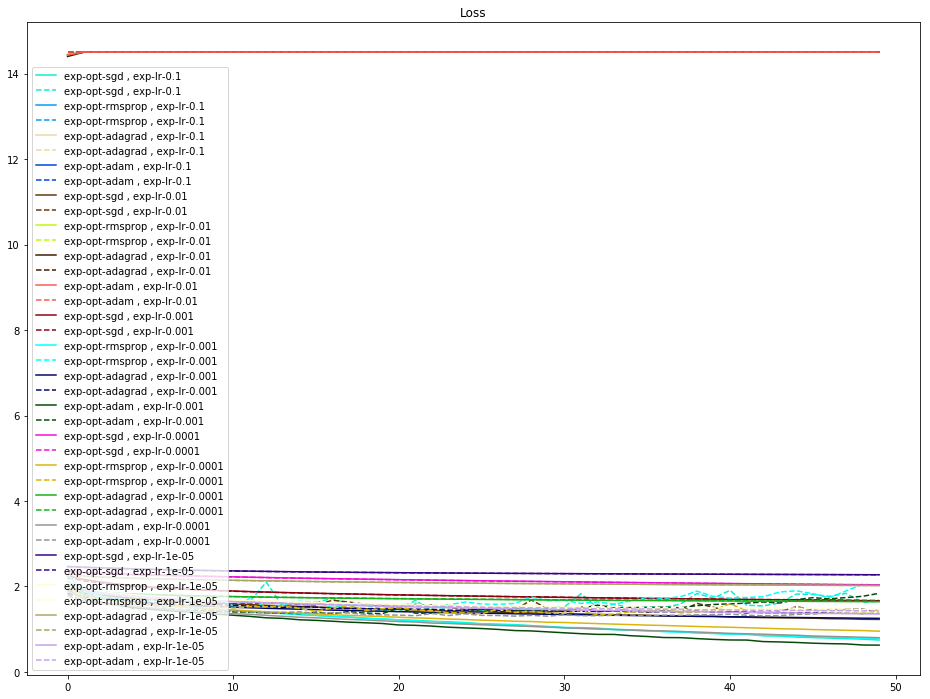

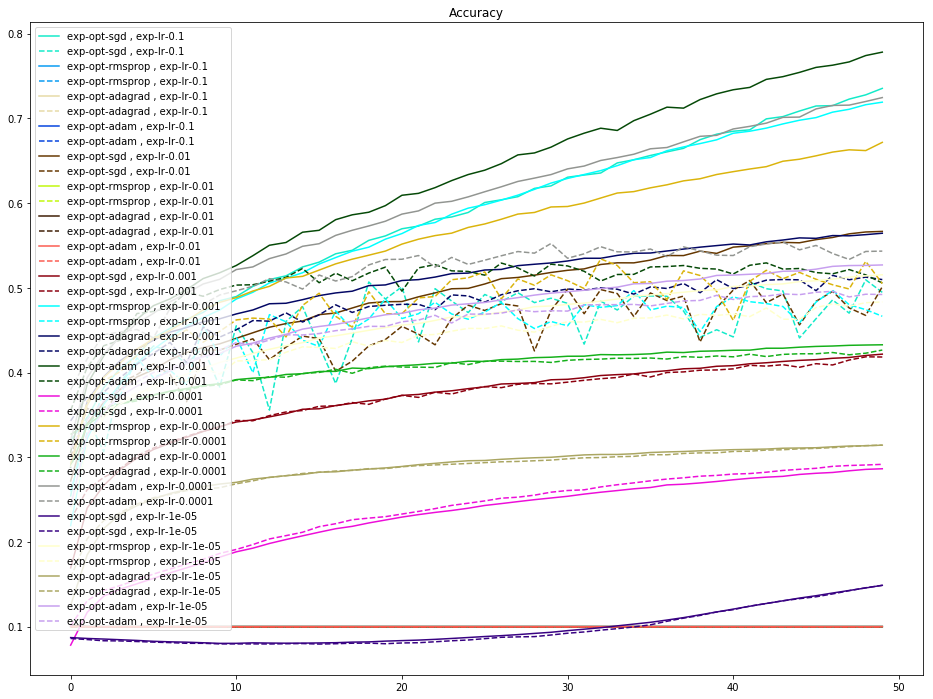

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
#color_bar = ["r", "g", "b", "y", "m", "k"]
color_bar = ["xkcd:aqua", "xkcd:azure", "xkcd:beige", "xkcd:blue", "xkcd:brown", "xkcd:chartreuse", 
             "xkcd:chocolate", "xkcd:coral", "xkcd:crimson", "xkcd:cyan", "xkcd:darkblue", "xkcd:darkgreen", 
             "xkcd:fuchsia", "xkcd:gold", "xkcd:green", "xkcd:gray", "xkcd:indigo", "xkcd:ivory", 
             "xkcd:khaki", "xkcd:lavender", "xkcd:lightblue", "xkcd:lightgreen", "xkcd:lime", "xkcd:orange"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()